In [114]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
sns.set(style = 'whitegrid')

In [120]:
st.title("Sales Prdiction Dashboards")
st.set_page_config(page_title = "Sales Prdiction Dashboards", layout = "wide")
df = pd.read_csv("Sample - Superstore.csv", encoding ='ISO-8859-1')
st.write(df.head())

2025-07-31 14:54:35.241 
  command:

    streamlit run C:\Users\Taofeeq\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#Summary statistics
print(df.describe())

print(df.dtypes)
print(f"\nthe data contains: {df.shape[0]} rows and {df.shape[1]} columns")
print(df.info)

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
C

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
#Grouping data into categorical and numerical categories
categorical_vars = df.select_dtypes(include = ['object', 'category']).columns.tolist()
numerical_vars = df.select_dtypes(include = ['number']).columns.tolist()
print(f"Categorical Data: {categorical_vars}\nNumerical Data: {numerical_vars}")

Categorical Data: ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
Numerical Data: ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


In [7]:
#Univariate analysis
numerical_vars

['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

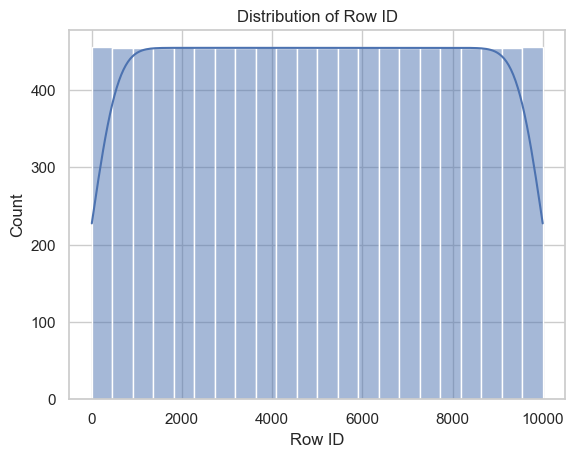

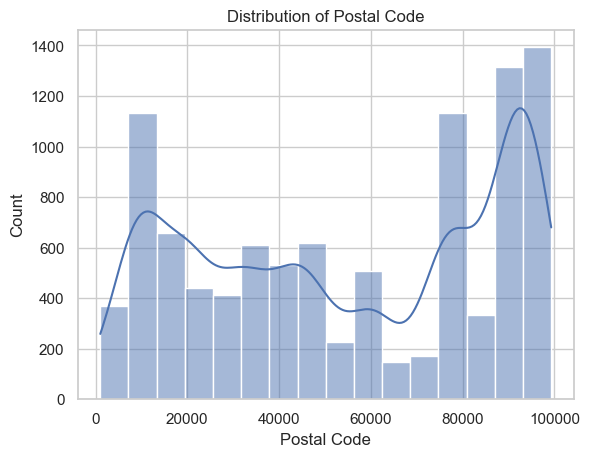

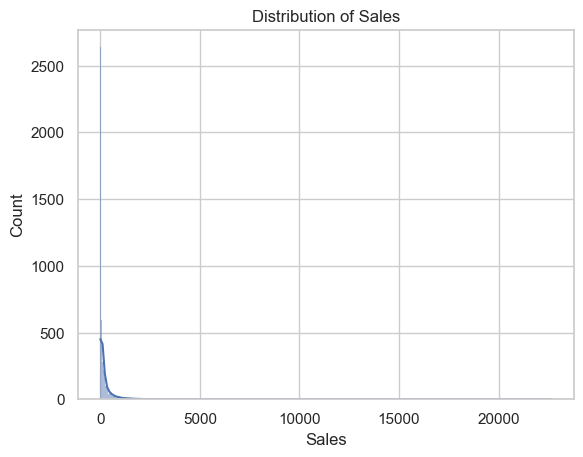

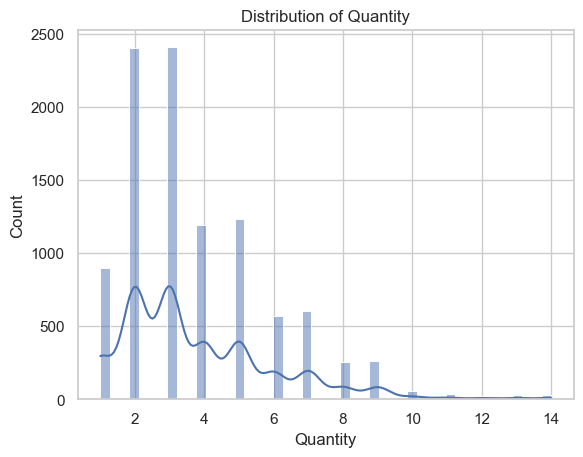

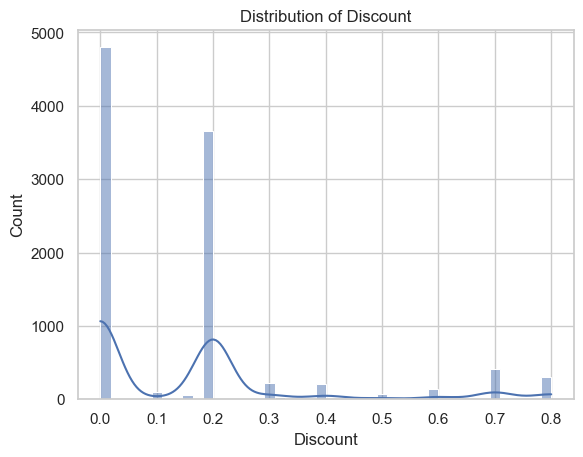

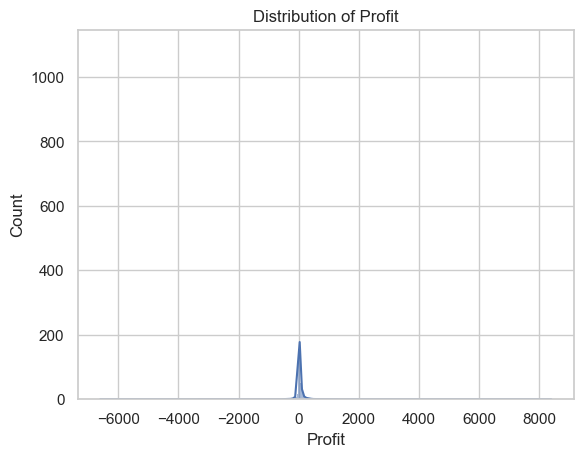

In [8]:
for var in numerical_vars:
    sns.histplot(df[var], kde = True)
    plt.title(f'Distribution of {var}')
    plt.show()

In [9]:
numerical_vars.remove("Row ID")
numerical_vars

['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

In [10]:
numerical_vars.remove("Postal Code")
numerical_vars

['Sales', 'Quantity', 'Discount', 'Profit']

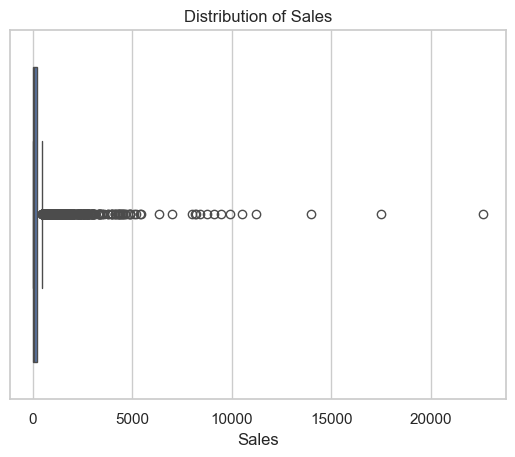

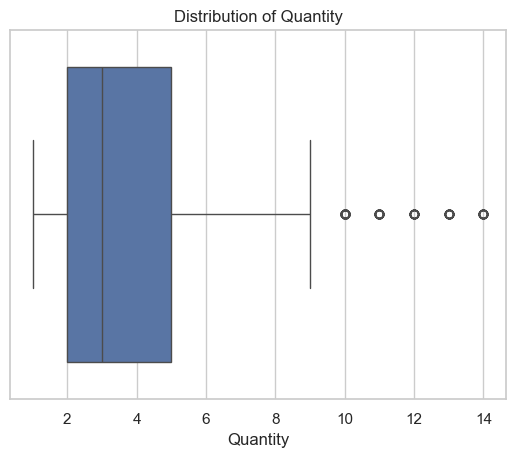

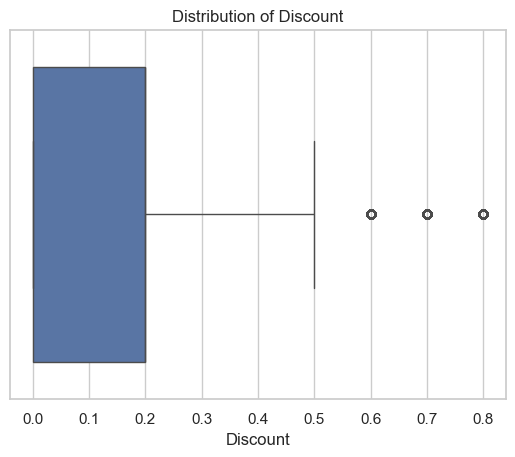

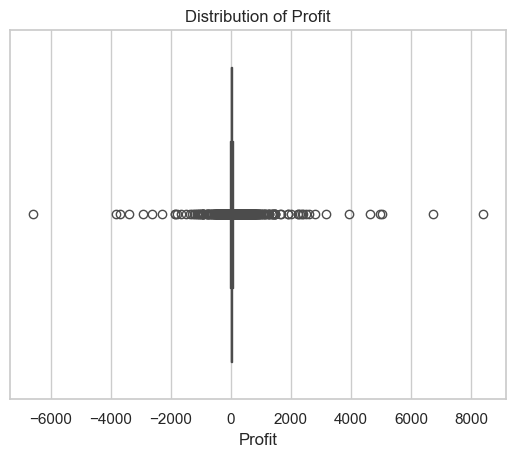

In [11]:
for var in ['Sales', 'Quantity', 'Discount', 'Profit']:
    sns.boxplot(x=df[var])
    plt.title(f'Distribution of {var}')
    plt.show()

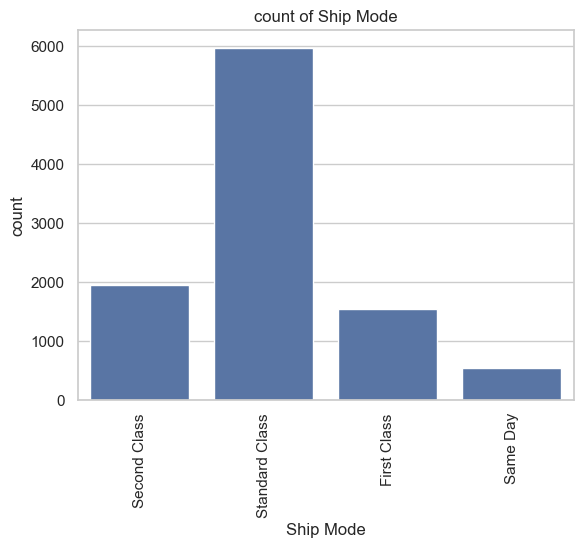

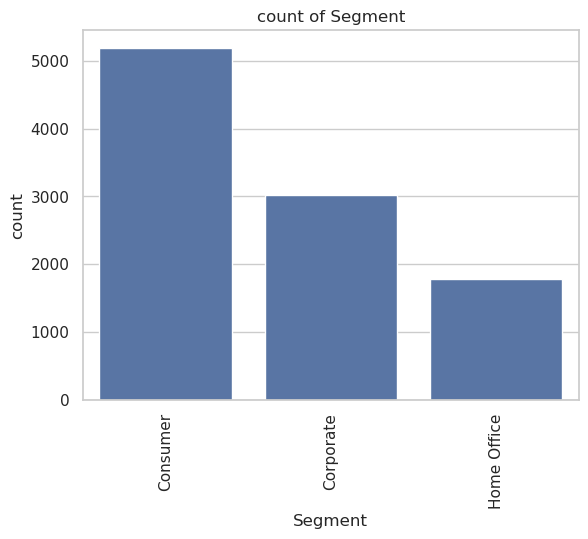

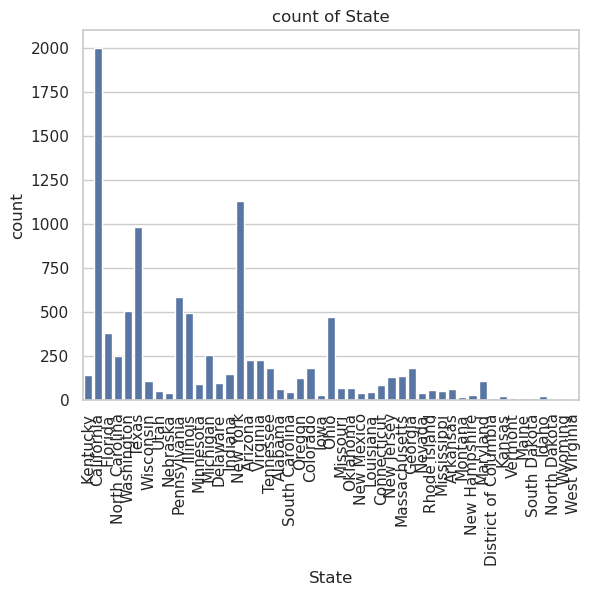

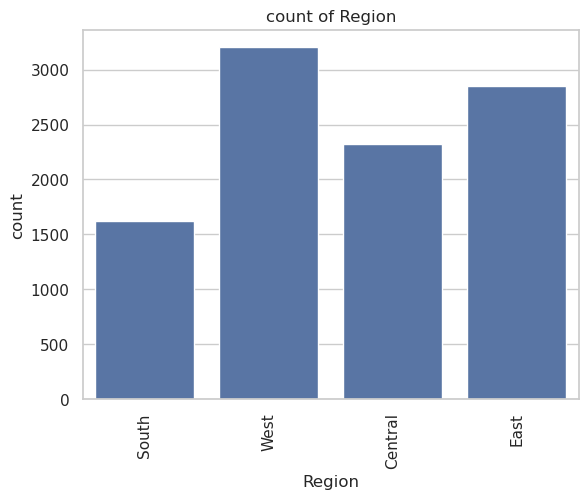

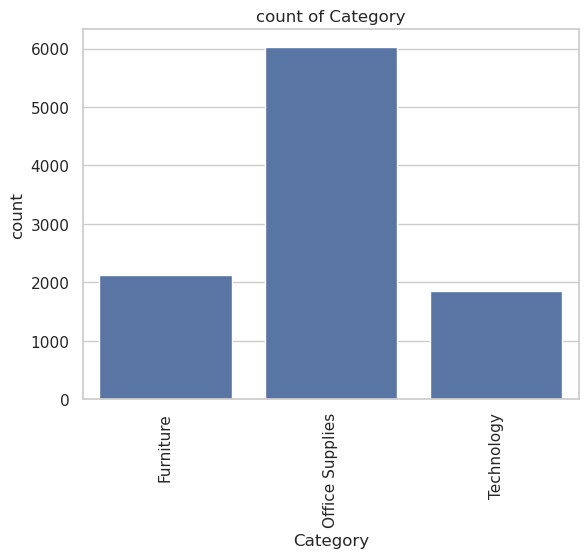

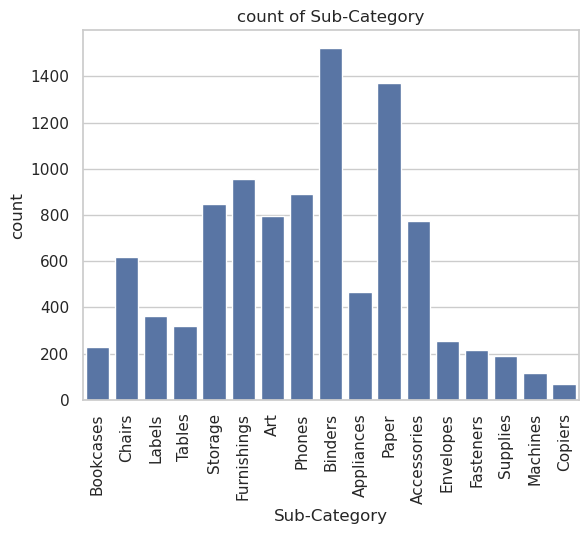

In [12]:
#Univariate analysis for the categorical variables
categorical_vars = df.select_dtypes(include = ['object', 'category']).columns.tolist()
to_remove = ["Order ID", "Order Date", "Ship Date", "Customer Name", "Customer ID", "Product ID","Country", "City", "Product Name"]
for item in to_remove:
    categorical_vars.remove(item)
for var in categorical_vars:
    sns.countplot(x=var, data = df)
    plt.title(f'count of {var}')
    plt.xticks(rotation = 90)
    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.show()

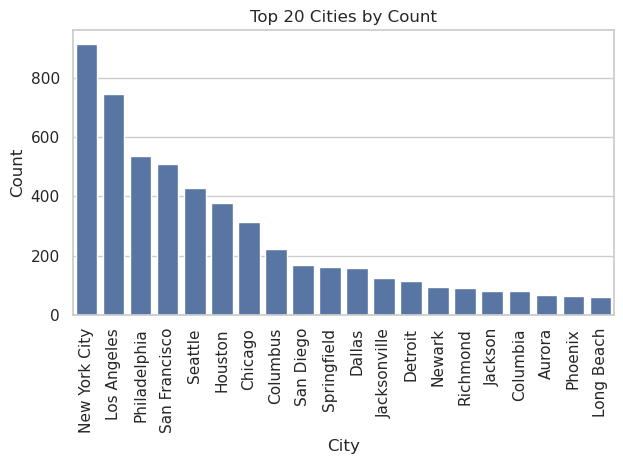

In [13]:
top_cities = df['City'].value_counts().head(20)  # top 10 cities
sns.barplot(x=top_cities.index, y=top_cities.values)

plt.title("Top 20 Cities by Count")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

          Category  Quantity        Sales       Profit  Discount
0        Furniture      8028  741999.7953   18451.2728    368.89
1  Office Supplies     22906  719047.0320  122490.8008    947.80
2       Technology      6939  836154.0330  145454.9481    244.40


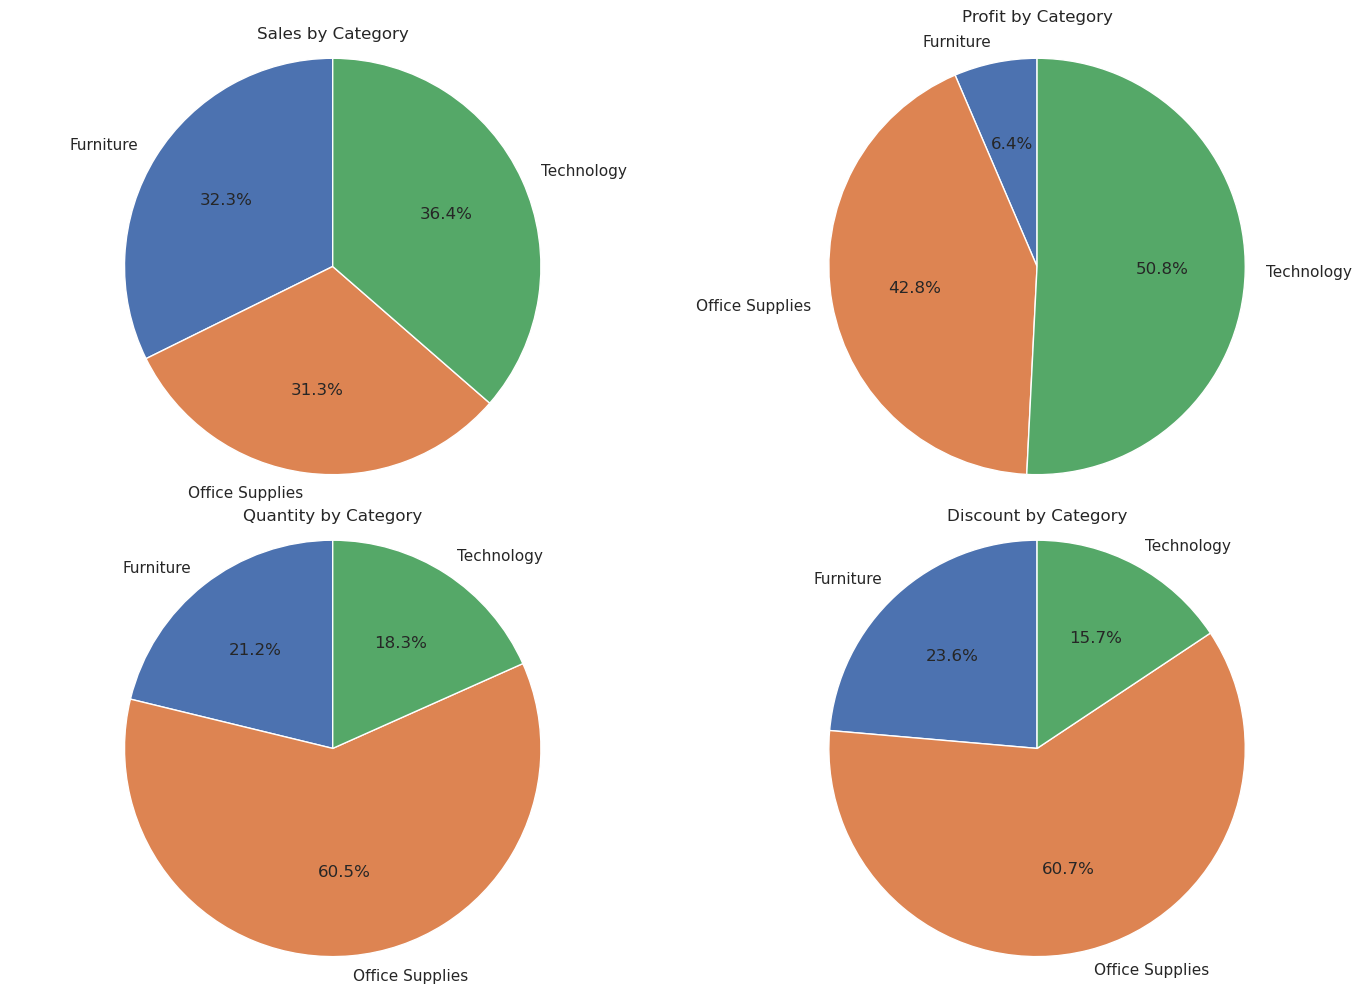

In [14]:
#Bivariate analysis

group = df.groupby('Category')[['Quantity','Sales', 'Profit', 'Discount']].sum().reset_index()
print(group)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid

# Pie 1: Sales
axes[0, 0].pie(group['Sales'], labels=group['Category'], autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Sales by Category')
axes[0, 0].axis('equal')

# Pie 2: Profit
axes[0, 1].pie(group['Profit'], labels = group['Category'], autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Profit by Category\n')
axes[0, 1].axis('equal')

# Pie 3: Quantity
axes[1, 0].pie(group['Quantity'], labels=group['Category'], autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Quantity by Category')
axes[1, 0].axis('equal')

# Pie 4: Discount
axes[1, 1].pie(group['Discount'], labels=group['Category'], autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Discount by Category')
axes[1, 1].axis('equal')

plt.tight_layout()
plt.show()

   Sub-Category  Quantity        Sales      Profit  Discount
0   Accessories      2976  167380.3180  41936.6357     60.80
1    Appliances      1729  107532.1610  18138.0054     77.60
2           Art      3000   27118.7920   6527.7870     59.60
3       Binders      5974  203412.7330  30221.7633    567.00
4     Bookcases       868  114879.9963  -3472.5560     48.14
5        Chairs      2356  328449.1030  26590.1663    105.00
6       Copiers       234  149528.0300  55617.8249     11.00
7     Envelopes       906   16476.4020   6964.1767     20.40
8     Fasteners       914    3024.2800    949.5182     17.80
9   Furnishings      3563   91705.1640  13059.1436    132.40
10       Labels      1400   12486.3120   5546.2540     25.00
11     Machines       440  189238.6310   3384.7569     35.20
12        Paper      5178   78479.2060  34053.5693    102.60
13       Phones      3289  330007.0540  44515.7306    137.40
14      Storage      3158  223843.6080  21278.8264     63.20
15     Supplies       64

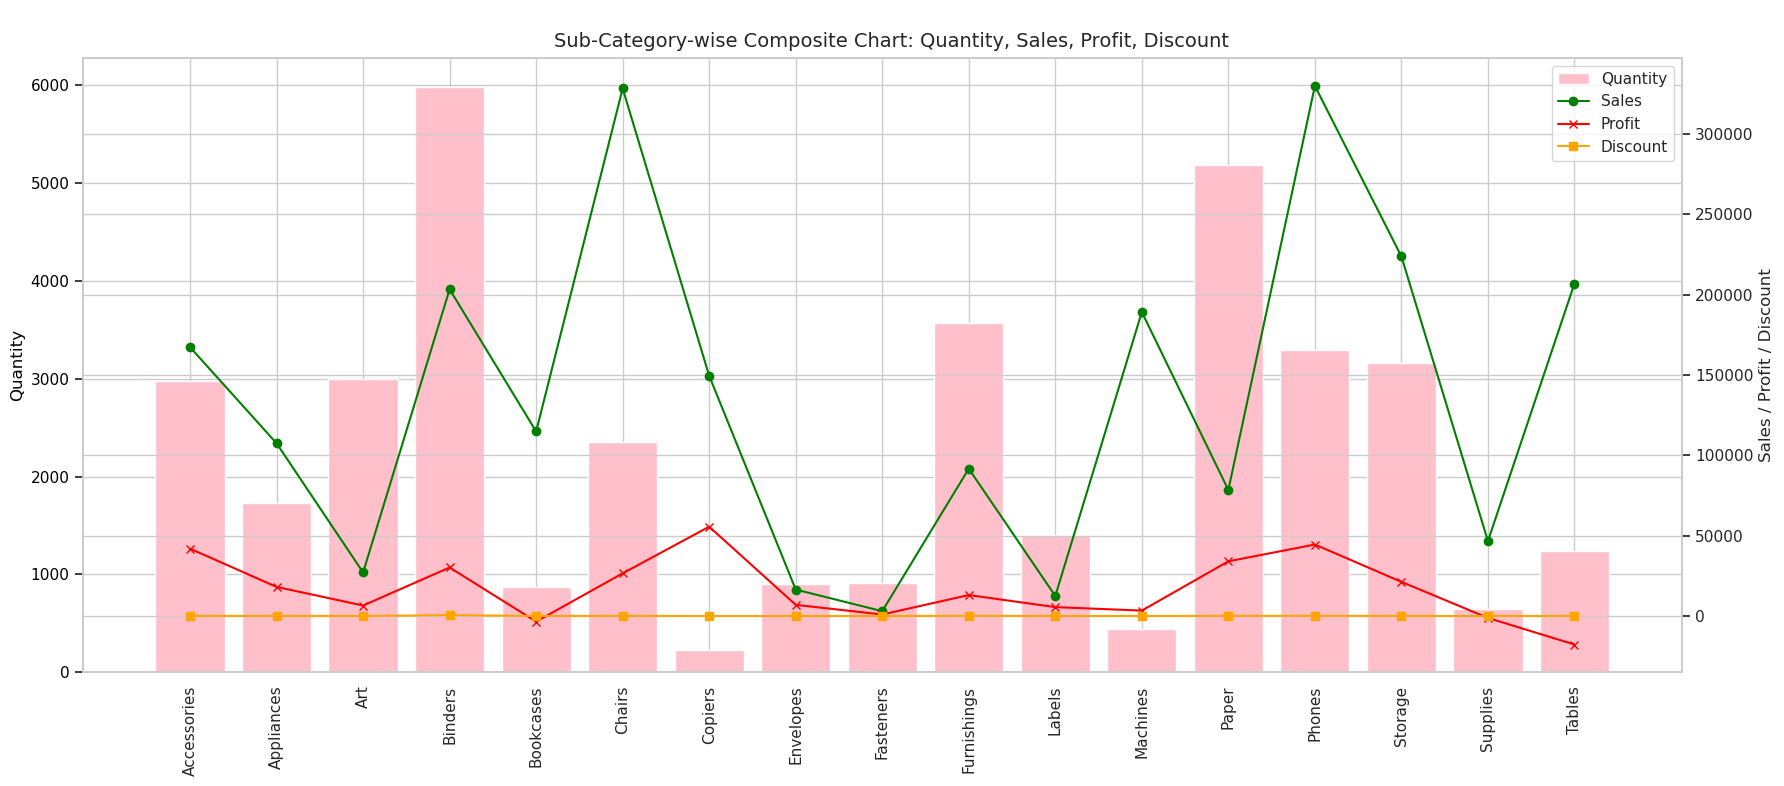

In [15]:
sub_group = df.groupby('Sub-Category')[['Quantity','Sales', 'Profit', 'Discount']].sum().reset_index()
print(sub_group)
print(f'\n Arranged in descending order of quantity:\n {sub_group.sort_values(by = 'Quantity', ascending = False)}')
#plot composite chart
fig, ax1 = plt.subplots(figsize = (18,8))
ax1.bar(sub_group['Sub-Category'], sub_group['Quantity'], color = 'pink', label = 'Quantity')
ax1.set_ylabel('Quantity', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(len(sub_group['Sub-Category'])))
ax1.set_xticklabels(sub_group['Sub-Category'], rotation=90) 
#plotting the line plots
ax2 = ax1.twinx()
ax2.plot(sub_group['Sub-Category'], sub_group['Sales'], color='green', marker='o', label='Sales')
ax2.plot(sub_group['Sub-Category'], sub_group['Profit'], color='red', marker='x', label='Profit')
ax2.plot(sub_group['Sub-Category'], sub_group['Discount'], color='orange', marker='s', label='Discount')
ax2.set_ylabel('Sales / Profit / Discount')
fig.suptitle('\nSub-Category-wise Composite Chart: Quantity, Sales, Profit, Discount', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

In [16]:
group_state = df.groupby('State')[['Quantity','Sales', 'Profit', 'Discount']].sum().reset_index()
print(group_state)

                   State  Quantity        Sales      Profit  Discount
0                Alabama       256   19510.6400   5786.8253      0.00
1                Arizona       862   35282.0010  -3427.9246     68.00
2               Arkansas       240   11678.1300   4008.6871      0.00
3             California      7667  457687.6315  76381.3871    145.60
4               Colorado       693   32108.1180  -6527.8579     57.60
5            Connecticut       281   13384.3570   3511.4918      0.60
6               Delaware       367   27451.0690   9977.3748      0.60
7   District of Columbia        40    2865.0200   1059.5893      0.00
8                Florida      1379   89473.7080  -3399.3017    114.65
9                Georgia       705   49095.8400  16250.0433      0.00
10                 Idaho        64    4382.4860    826.7231      1.80
11              Illinois      1845   80166.1010 -12607.8870    191.90
12               Indiana       578   53555.3600  18382.9363      0.00
13                  

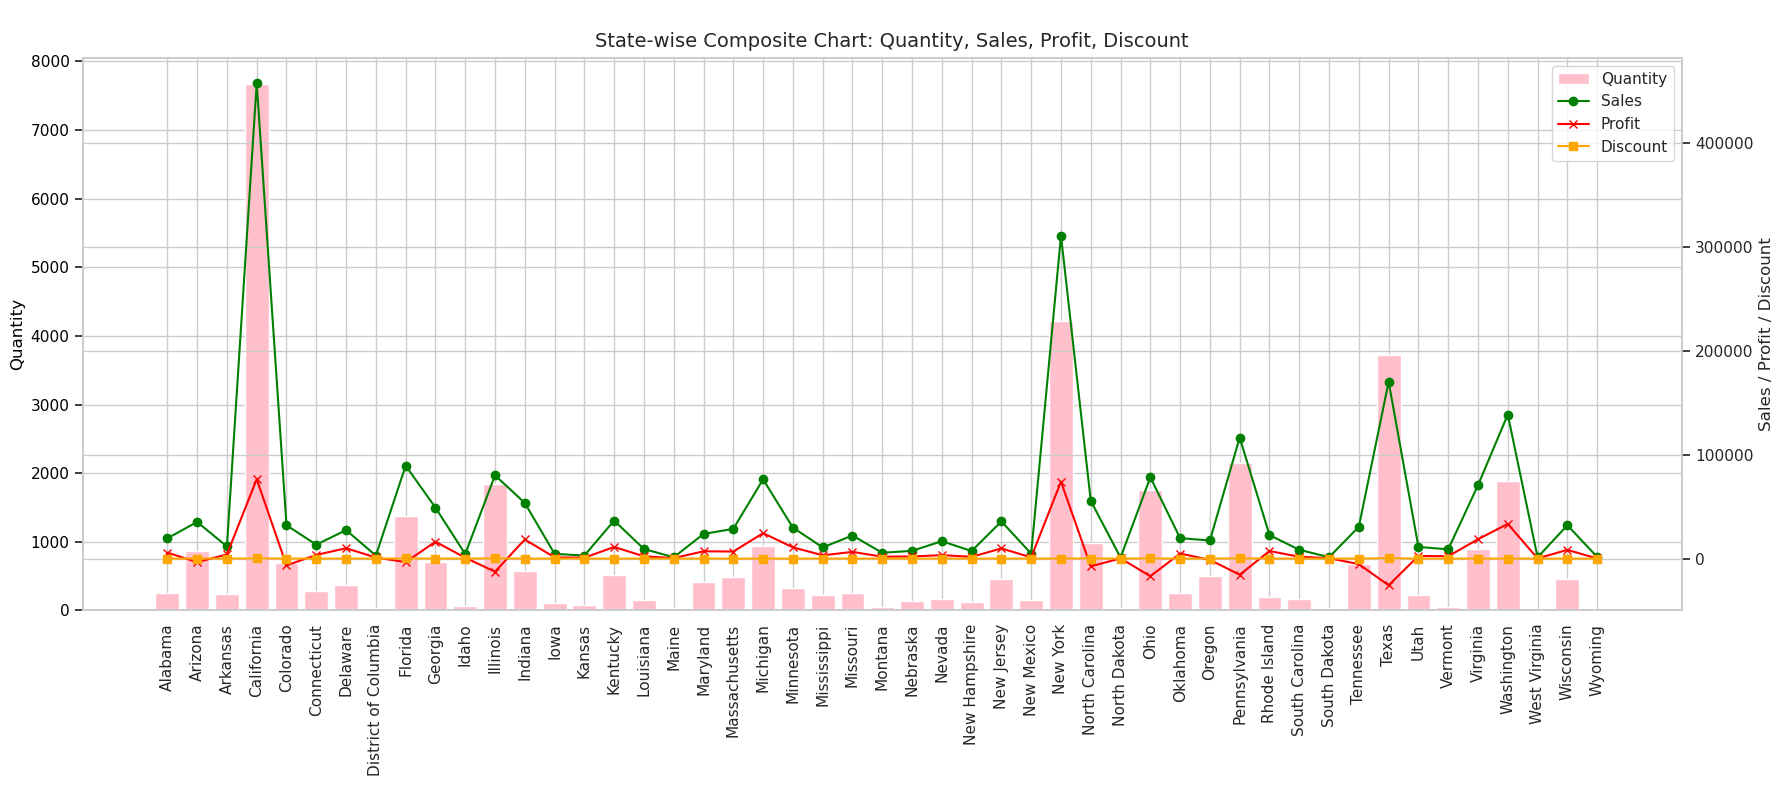

In [17]:
#plot composite chart
fig, ax1 = plt.subplots(figsize = (18,8))
ax1.bar(group_state['State'], group_state['Quantity'], color = 'pink', label = 'Quantity')
ax1.set_ylabel('Quantity', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(len(group_state['State'])))
ax1.set_xticklabels(group_state['State'], rotation=90) 
#plotting the line plots
ax2 = ax1.twinx()
ax2.plot(group_state['State'], group_state['Sales'], color='green', marker='o', label='Sales')
ax2.plot(group_state['State'], group_state['Profit'], color='red', marker='x', label='Profit')
ax2.plot(group_state['State'], group_state['Discount'], color='orange', marker='s', label='Discount')
ax2.set_ylabel('Sales / Profit / Discount')
fig.suptitle('\nState-wise Composite Chart: Quantity, Sales, Profit, Discount', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [19]:
numerical_vars

['Sales', 'Quantity', 'Discount', 'Profit']

               Row ID  Postal Code     Sales  Quantity  Discount    Profit
Row ID       1.000000     0.009671 -0.001359 -0.004016  0.013480  0.012497
Postal Code  0.009671     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales       -0.001359    -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity    -0.004016     0.012761  0.200795  1.000000  0.008623  0.066253
Discount     0.013480     0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit       0.012497    -0.029961  0.479064  0.066253 -0.219487  1.000000


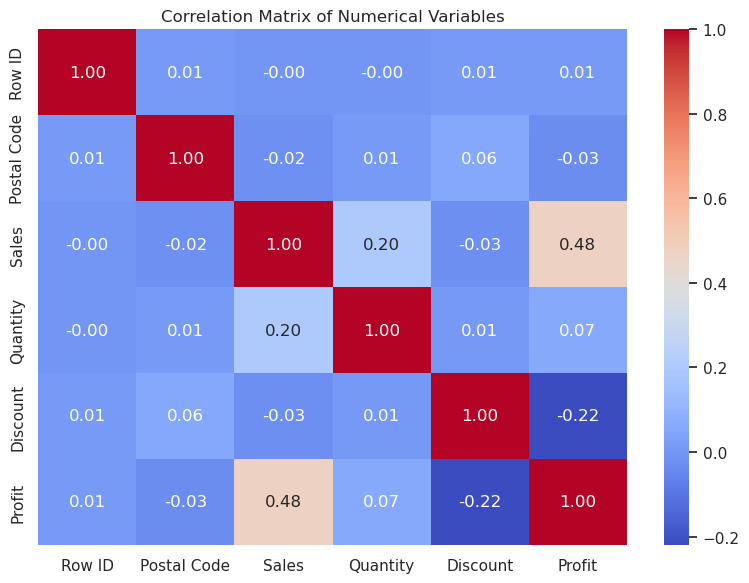

In [20]:
#Correlation
numerical_vars = df.select_dtypes(include='number')
correlation_matrix = numerical_vars.corr()
print(correlation_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()

In [21]:
####### Logistics Regression #############
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [22]:
#df_numeric = df.select_dtypes(include =['number'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_DayOfWeek'] = df['Order Date'].dt.dayofweek
features = ['Quantity', 'Discount', 'Category', 'Sub-Category', 'Segment', 'Region','Order_Year', 'Order_Month', 'Order_DayOfWeek']
x = pd.get_dummies(df[features], drop_first=True)
y = df['Sales']

In [23]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [24]:
#model training
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [25]:
#Predict and Evaluate
y_pred = model.predict(x_test)
print("mean squared error:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

mean squared error: 480656.8322567877
R2 score: 0.18629166499305638


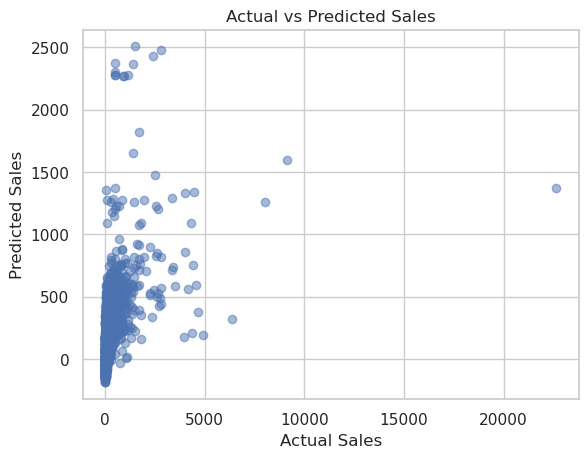

In [26]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

Mean Squared Error: 450283.01156748313
R² Score: 0.23771178305285634


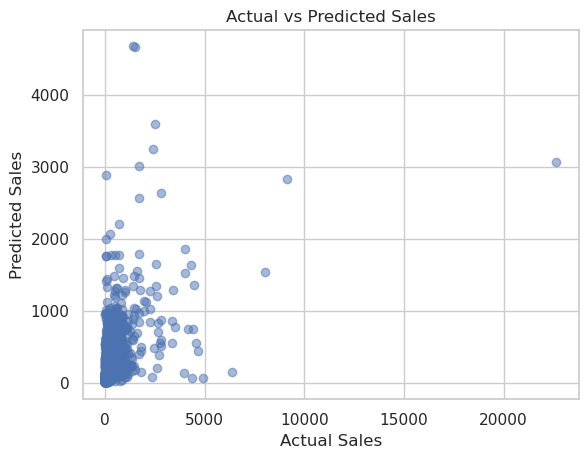

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Parse date
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Feature Engineering
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_DayOfWeek'] = df['Order Date'].dt.dayofweek

# Drop columns that leak or are irrelevant
drop_cols = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Order Date',
             'Ship Date', 'Product ID', 'Product Name', 'Country', 'City', 'State',
             'Postal Code', 'Profit']  
df = df.drop(columns=drop_cols)

# Define features and target
X = df.drop('Sales', axis=1)
y = df['Sales']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

#Visualize results
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [29]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
df.head()

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Order_Year,Order_Month,Order_DayOfWeek
0,Second Class,Consumer,South,Furniture,Bookcases,261.9600,2,0.00,2016,11,1
1,Second Class,Consumer,South,Furniture,Chairs,731.9400,3,0.00,2016,11,1
2,Second Class,Corporate,West,Office Supplies,Labels,14.6200,2,0.00,2016,6,6
3,Standard Class,Consumer,South,Furniture,Tables,957.5775,5,0.45,2015,10,6
4,Standard Class,Consumer,South,Office Supplies,Storage,22.3680,2,0.20,2015,10,6


Epoch 1/100


C:\Users\Taofeeq\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 435867.0312 - mae: 221.0260 - val_loss: 237241.2188 - val_mae: 170.0017
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 377621.3438 - mae: 181.2493 - val_loss: 189934.8750 - val_mae: 186.6423
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 232789.5625 - mae: 195.0232 - val_loss: 184631.9375 - val_mae: 190.8185
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 422220.0625 - mae: 216.8814 - val_loss: 182318.4531 - val_mae: 187.0009
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 364020.5938 - mae: 206.7125 - val_loss: 181693.7031 - val_mae: 186.8643
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250955.1094 - mae: 192.7525 - val_loss: 181770.6094 - val_mae: 189.4858
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266243.3750 - mae: 195.8443 - val_loss: 181653.2500 - val_mae: 186.6575
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216581.0156 - mae: 1

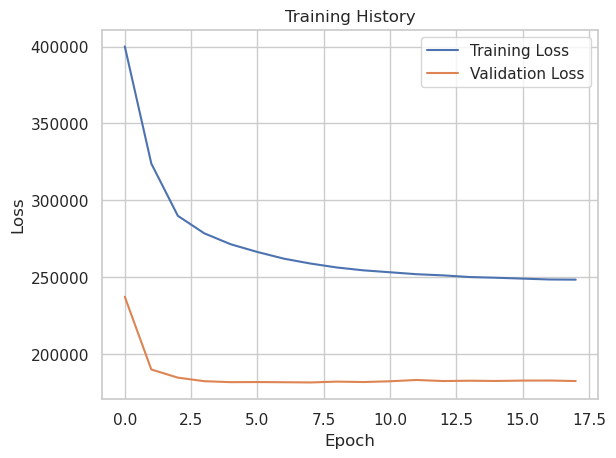

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [76]:
#drop_cols = ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID',
#'Customer Name', 'Country', 'City', 'State', 'Postal Code',
          #   'Product ID', 'Product Name']
#df_model = df.drop(columns=drop_cols)

# One-hot encode categorical variables
#df_model = pd.get_dummies(df_model, drop_first=True)

# Split features and target
#X = df_model.drop('Sales', axis=1)
#y = df_model['Sales']

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_scaled, y_train, validation_split=0.2,
                    epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# Evaluate model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Absolute Error: {mae:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.show()

# Predict on test data
y_pred = model.predict(X_test_scaled)


AttributeError: 'Series' object has no attribute 'flatten'

In [110]:
y_pred.shape

(1999, 1)

In [32]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Absolute Error: {mae:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 485855.5625 - mae: 202.7126
Mean Absolute Error: 204.46
